In [22]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd

In [23]:
# Open a netCDF file
#filename='/Users/jungeunl/Cycad/class/data/trmm_mon_1998_2015.nc'  # Note that the time coordinate is not correct
filename='trmm_mon_1998_2015.nc'
with xr.open_dataset(filename) as ds: 
    print(ds) 
    prcp=ds.pcp*24
print(ds.time)

<xarray.Dataset>
Dimensions:    (latitude: 400, longitude: 1440, time: 12)
Coordinates:
  * time       (time) datetime64[ns] 2006-07-02T12:00:00 ... 2007-06-01T17:20:00
  * longitude  (longitude) float64 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * latitude   (latitude) float64 -49.88 -49.62 -49.38 ... 49.38 49.62 49.88
Data variables:
    pcp        (time, latitude, longitude) float32 ...
    err        (time, latitude, longitude) float32 ...
    weight     (time, latitude, longitude) float32 ...
Attributes:
    Conventions:               CF-1.4
    calendar:                  standard
    comments:                  file created by grads using lats4d available f...
    model:                     geos/das
    center:                    gsfc
    history:                   Mon Jun  6 13:47:33 2016: ncrcat /Users/jungeu...
    nco_openmp_thread_number:  1
<xarray.DataArray 'time' (time: 12)>
array(['2006-07-02T12:00:00.000000000', '2006-08-02T12:00:00.000000000',
       '2006-08-30T17:20

In [24]:
# New time axis
time = pd.date_range('2000-01-01', freq="MS", periods=12)

# Create New DataArray

pr_new = xr.DataArray(
    prcp,
    dims=["time", "latitude", "longitude"],
    coords={"time": time, "latitude": ds.latitude, "longitude": ds.longitude},
            )
print(time)

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01', '2000-11-01', '2000-12-01'],
              dtype='datetime64[ns]', freq='MS')


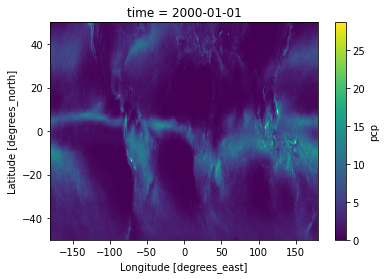

In [26]:
pr_new.isel(time=0).plot()

In [27]:
base_u = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/surface/uwnd.sig995'
base_v = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/surface/vwnd.sig995'


#files = [f'{base_u}.{year}.nc' for year in range(1948, 2020)]
files_u = [f'{base_u}.{year}.nc' for year in range(2019, 2021)]
files_v = [f'{base_v}.{year}.nc' for year in range(2019, 2021)]
print(files_u)

['http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/surface/uwnd.sig995.2019.nc', 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/surface/uwnd.sig995.2020.nc']


In [28]:
ds1 = xr.open_mfdataset(files_u)
ds2 = xr.open_mfdataset(files_v)
print(ds1)
print(ds2)

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 2924)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 2019-01-01 ... 2020-12-31T18:00:00
Data variables:
    uwnd     (time, lat, lon) float32 dask.array<chunksize=(1460, 73, 144), meta=np.ndarray>
Attributes:
    Conventions:                     COARDS
    title:                           4x daily NMC reanalysis (2014)
    history:                         created 2017/12 by Hoop (netCDF2.3)
    description:                     Data is from NMC initialized reanalysis\...
    platform:                        Model
    dataset_title:                   NCEP-NCAR Reanalysis 1
    References:                      http://www.psl.noaa.gov/data/gridded/dat...
    DODS_EXTRA.Unlimited_Dimension:  time
<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 2924)
Coordinates:
  * lat    

In [29]:
u=ds1.uwnd
v=ds2.vwnd

In [30]:
u_clim=u.groupby('time.month').mean(dim='time')
v_clim=v.groupby('time.month').mean(dim='time')
print(u_clim)

<xarray.DataArray 'uwnd' (month: 12, lat: 73, lon: 144)>
dask.array<stack, shape=(12, 73, 144), dtype=float32, chunksize=(1, 73, 144), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12


### Plotting wind vectors
quiver:   
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html   
quiverkey:   
https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.quiverkey.html   
Example:   
https://matplotlib.org/2.0.2/examples/pylab_examples/quiver_demo.html

/Users/jungeunl/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


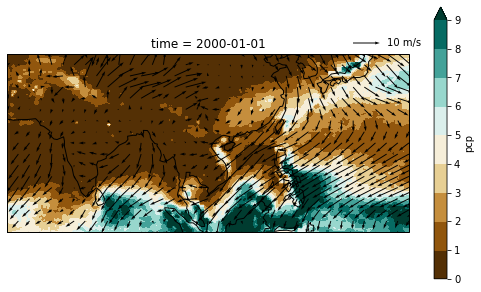

In [43]:
# January average over Asia
lev1=np.arange(0,10,1)
proj = ccrs.PlateCarree()
cmap1=plt.cm.BrBG
fig1 = plt.figure(figsize=(9,5))
ax1 = plt.axes(projection=ccrs.PlateCarree())
pr_new.isel(time=0).plot.contourf(ax=ax1, transform=ccrs.PlateCarree(),levels=lev1, cmap=cmap1)
ax1.coastlines()
q1=ax1.quiver(ds1.lon,ds1.lat,u_clim[0,:,:],v_clim[0,:,:],transform=proj,scale=150) # (lon,lat,u,v)
plt.quiverkey(q1, 0.70, 0.78, 10, r'10 m/s', labelpos='E',
                   coordinates='figure') # (Q,X,Y,U,label)
ax1.set_extent([30, 150, -10, 40], ccrs.PlateCarree())

### Exercise
Plot average precipitation and low-level wind for July over the Asian monsoon region.

### Exercise
Plot average precipitation and low-level wind for January and July over the region of your choice.